<a href="https://colab.research.google.com/github/AISEN312/first-contributions/blob/main/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file_path = '/content/tabular-lstm-evaluate-671d0c61cbaeaaff2919d4a6-data_preview.csv'
data = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
             material name      synthesis method    types of defect  \
0            Rhodium Oxide          Hydrothermal  Holmium Vacancies   
1            Yttrium Oxide  Magnetron Sputtering     Zinc Vacancies   
2         Molybdenum Oxide  Magnetron Sputtering  Yttrium Vacancies   
3           Europium Oxide  Precipitation Method  Holmium Vacancies   
4  Cerium Oxide (Zr-doped)          Hydrothermal  Holmium Vacancies   

   band gap energy  defevt concentration  photolytic activity  
0              1.9                  0.27             1.000000  
1             95.8                  5.04             1.000000  
2             38.9                  4.29             1.000000  
3              1.9                  1.90             0.995386  
4             95.8                  5.04             1.000000  


In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-5-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
for column in data.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])


In [ ]:
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # The last column as the target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X = data.drop(columns=['photolytic activity'])
y = data['photolytic activity']

In [ ]:
for column in X.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform(X[column])

In [ ]:
from sklearn.linear_model import LinearRegression # Import the LinearRegression class

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# Instead of using classification metrics, use regression metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0005910346397728516
R-squared: -0.005095979062218481


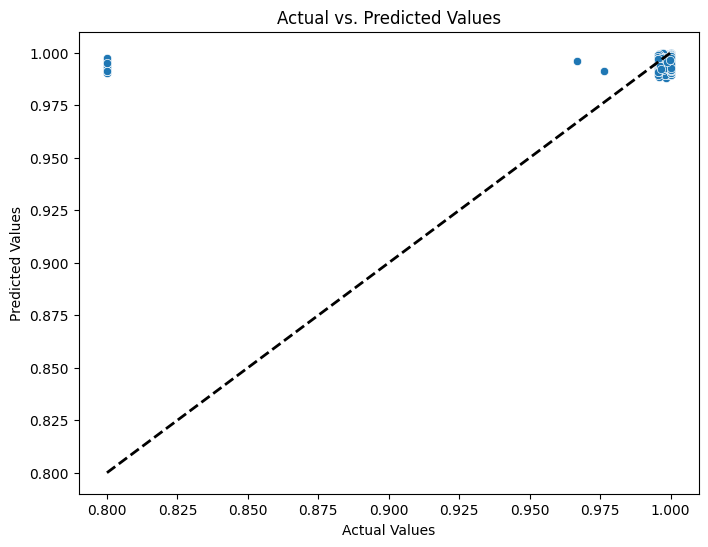

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for using np.unique

# Instead of a confusion matrix, create a scatter plot to visualize the relationship between predicted and actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred) # Assuming y_test and y_pred are your actual and predicted values respectively
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line for reference
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

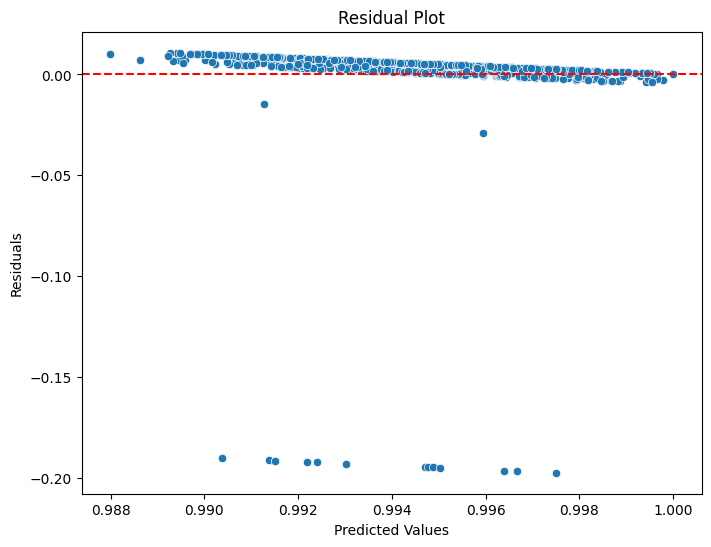

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0 for reference
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()